In [0]:
#https://colab.research.google.com/drive/17BHfi1S2rrNcRDdbUxlKUNHKUJ1ianBf

In [1]:
'''Train a simple deep CNN on the CIFAR10 small images dataset.
It gets to 75% validation accuracy in 25 epochs, and 79% after 50 epochs.
(it's still underfitting at that point, though).
'''

from __future__ import print_function
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.vis_utils import plot_model

import os

Using TensorFlow backend.


In [2]:
num_classes = 10
epochs = 30
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255



x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
def getModelHistory(batchsize):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',
                     input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    
    # initiate RMSprop optimizer
    opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

    # Let's train the model using RMSprop
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    
    hist = model.fit(x_train, y_train,
          batch_size=batchsize,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)
    
    # Save model and weights
    if not os.path.isdir(save_dir):
        os.makedirs(save_dir)
    model_path = os.path.join(save_dir, model_name)
    model.save(model_path)
    print('Saved trained model at %s ' % model_path)

    # Score trained model.
    scores = model.evaluate(x_test, y_test, verbose=1)
    print('Test loss:', scores[0])
    print('Test accuracy:', scores[1])
    
    return hist

In [0]:
def plotacc(hist):
  plt.plot(hist.history['acc'])
  plt.plot(hist.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [0]:
def plotloss(hist):
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [6]:
hist = getModelHistory(1024)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 16s 325us/step - loss: 2.1951 - acc: 0.1857 - val_loss: 2.0438 - val_acc: 0.2809
Epoch 2/30
50000/50000 [==============================] - 11s 214us/step - loss: 1.9955 - acc: 0.2730 - val_loss: 1.9968 - val_acc: 0.2841
Epoch 3/30
50000/50000 [==============================] - 10s 205us/step - loss: 1.8914 - acc: 0.3163 - val_loss: 1.8221 - val_acc: 0.3700
Epoch 4/30
50000/50000 [==============================] - 11s 214us/step - loss: 1.8163 - acc: 0.3459 - val_loss: 1.7400 - val_acc: 0.3872
Epoch 5/30
50000/50000 [==============================] - 11s 214us/step - loss: 1.7609 - acc: 0.3660 - val_loss: 1.6916 - val_acc: 0.4030
Epoch 6/30
50000/50000 [==============================] - 11s 215us/step - loss: 1.7130 - acc: 0.3838 - val_loss: 1.7185 - val_acc: 0.3852
Epoch 7/30
50000/50000 [==============================] - 11s 213us/step - loss: 1.6837 - acc: 0.3939 - val_loss: 1.

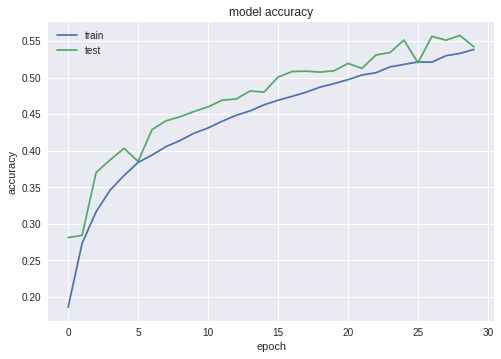

In [7]:
plotacc(hist)

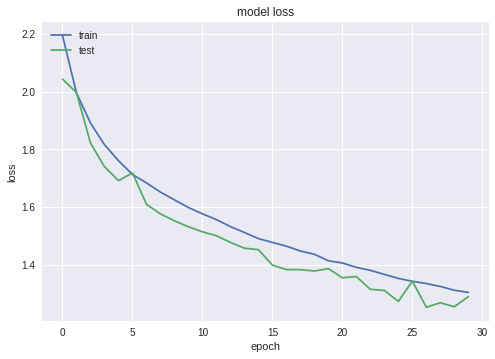

In [8]:
plotloss(hist)

In [10]:
hist64 = getModelHistory(64)

50000/50000 [==============================] - 27s 547us/step - loss: 1.8777 - acc: 0.3089 - val_loss: 1.6306 - val_acc: 0.4016
Epoch 2/30
50000/50000 [==============================] - 26s 530us/step - loss: 1.5802 - acc: 0.4250 - val_loss: 1.4721 - val_acc: 0.4759
Epoch 3/30
50000/50000 [==============================] - 26s 521us/step - loss: 1.4425 - acc: 0.4777 - val_loss: 1.3366 - val_acc: 0.5163
Epoch 4/30
50000/50000 [==============================] - 26s 520us/step - loss: 1.3496 - acc: 0.5139 - val_loss: 1.2574 - val_acc: 0.5563
Epoch 5/30
50000/50000 [==============================] - 27s 535us/step - loss: 1.2783 - acc: 0.5432 - val_loss: 1.1965 - val_acc: 0.5723
Epoch 6/30
50000/50000 [==============================] - 26s 516us/step - loss: 1.2258 - acc: 0.5635 - val_loss: 1.1493 - val_acc: 0.5928
Epoch 7/30
50000/50000 [==============================] - 27s 533us/step - loss: 1.1681 - acc: 0.5865 - val_loss: 1.1344 - val_acc: 0.6034
Epoch 8/30
50000/50000 [==============

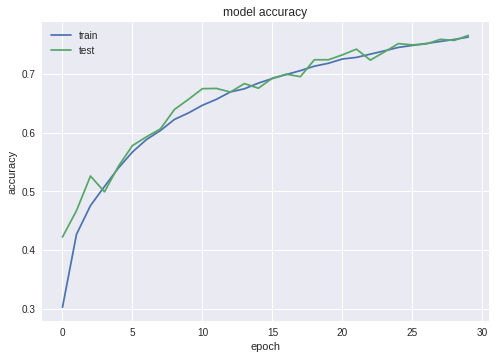

In [11]:
plotacc(hist64)

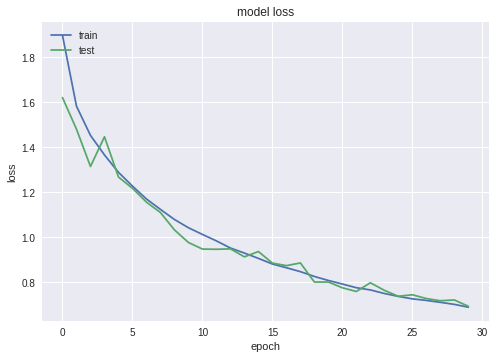

In [12]:
plotloss(hist64)

In [13]:
hist32 = getModelHistory(32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 39s 779us/step - loss: 1.8342 - acc: 0.3288 - val_loss: 1.5376 - val_acc: 0.4475
Epoch 2/30
50000/50000 [==============================] - 37s 744us/step - loss: 1.5178 - acc: 0.4501 - val_loss: 1.3603 - val_acc: 0.5139
Epoch 3/30
50000/50000 [==============================] - 38s 760us/step - loss: 1.3776 - acc: 0.5069 - val_loss: 1.2632 - val_acc: 0.5487
Epoch 4/30
50000/50000 [==============================] - 38s 752us/step - loss: 1.2752 - acc: 0.5457 - val_loss: 1.2337 - val_acc: 0.5695
Epoch 5/30
50000/50000 [==============================] - 38s 763us/step - loss: 1.1896 - acc: 0.5798 - val_loss: 1.0933 - val_acc: 0.6171
Epoch 6/30
50000/50000 [==============================] - 38s 759us/step - loss: 1.1261 - acc: 0.6018 - val_loss: 1.0307 - val_acc: 0.6363
Epoch 7/30
50000/50000 [==============================] - 38s 759us/step - loss: 1.0695 - acc: 0.6254 - val_loss: 1.

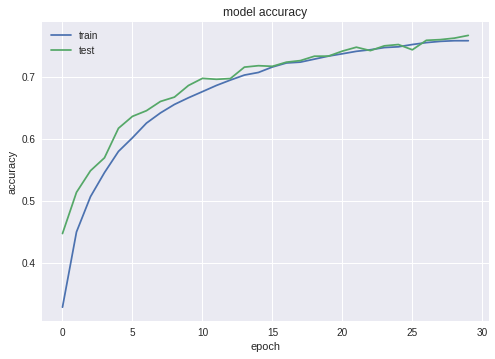

In [14]:
plotacc(hist32)

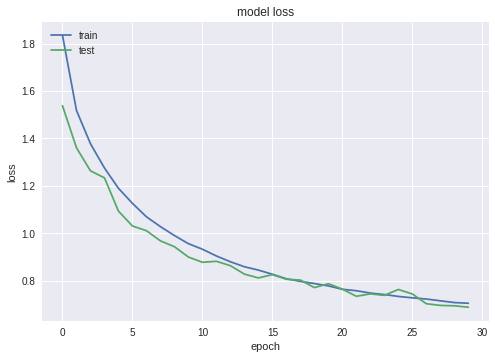

In [15]:
plotloss(hist32)